Лабораторная работа No.1, часть 1, датасет 2

Иванов Данила, 307 гр.


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv("churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

Можем заметить, что пропуски в данных отстутсвуют

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


# Data exploration

Распределение таргета:


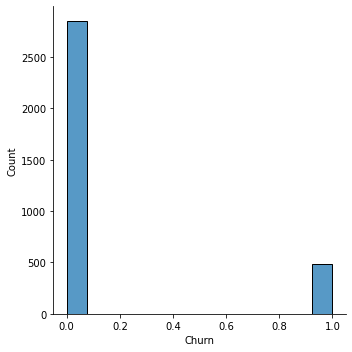

In [5]:
sns.displot(df, x="Churn")
plt.show()

Отток по географическому признаку:


In [6]:
order = sorted(list(set(df.State)))

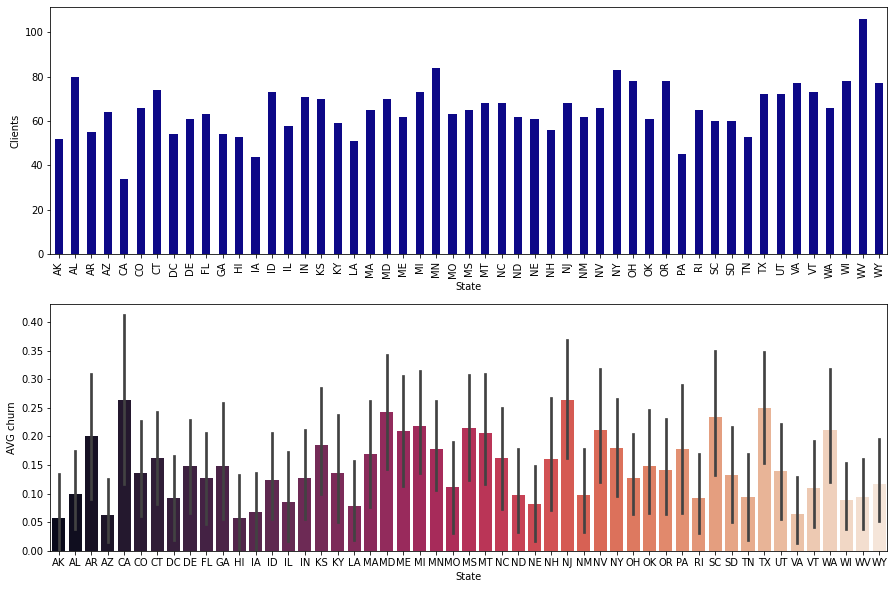

In [7]:
fig, axes = plt.subplots(2, 1, figsize=(15,10))
plt.subplot(211)
axes[0] = df.sort_values('State').groupby('State').size().plot(kind='bar', cmap="plasma", alpha=1).set_ylabel('Clients')

plt.subplot(212)
sns.color_palette("rocket")
sns.barplot(x ='State', y = 'Churn', data=df, palette='rocket', order=order).set_ylabel("AVG churn")
fig.show()

Пейрплот с наиболее важными признаками:

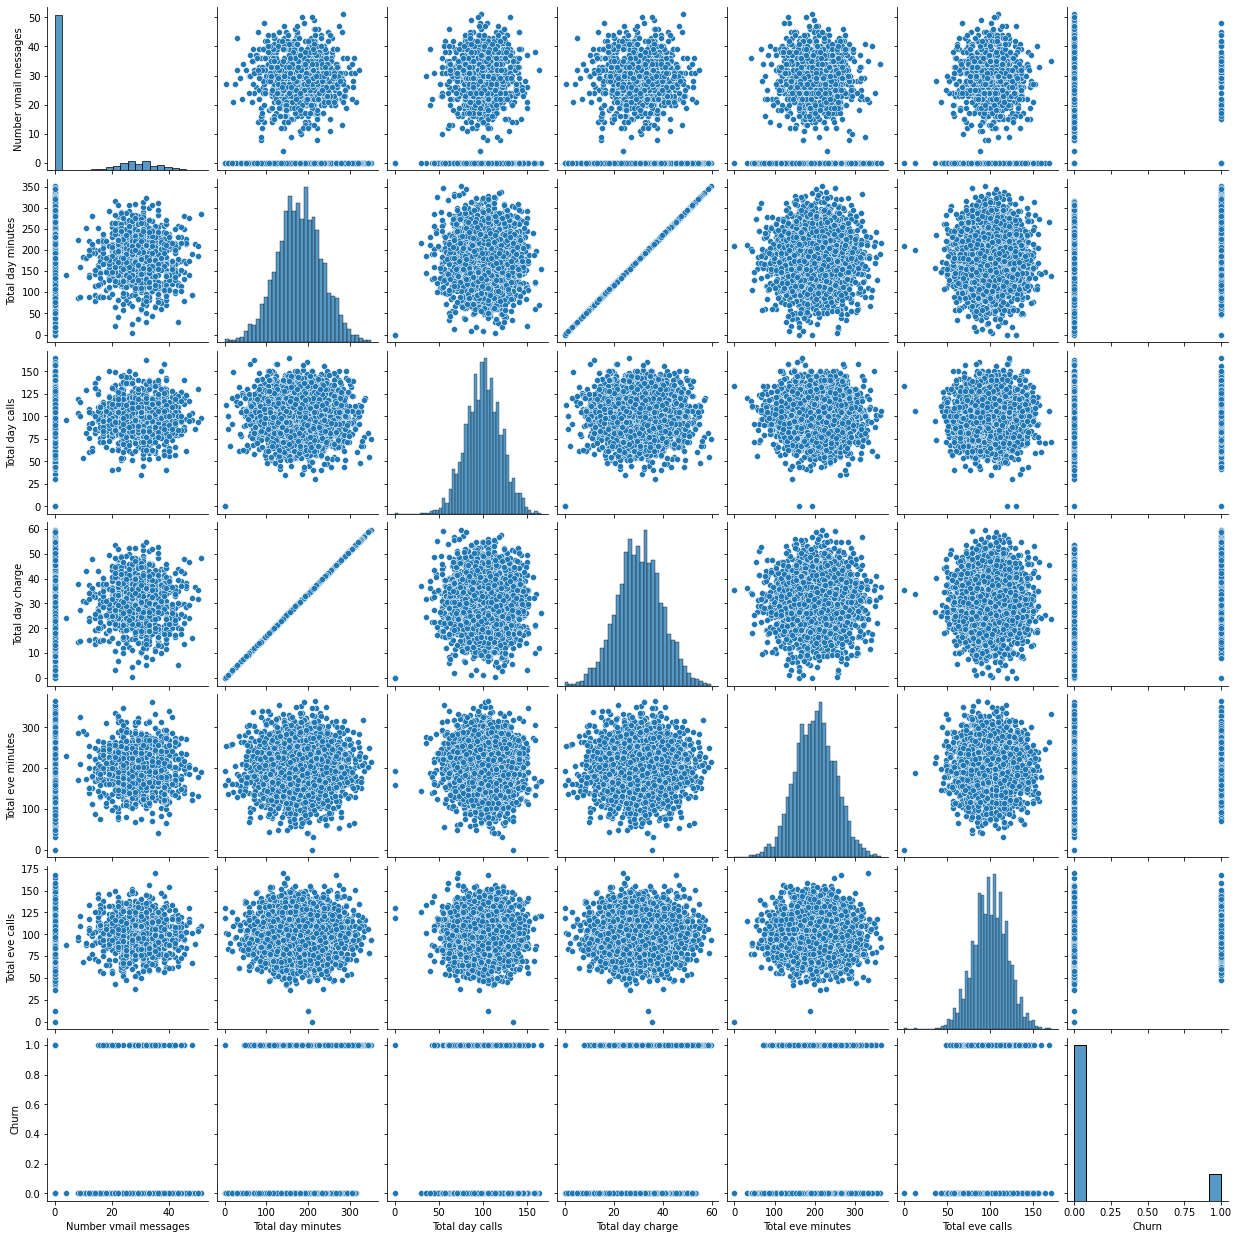

In [8]:
df['Churn'] = df['Churn'].apply(int)
sns.pairplot(df[['Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Churn']])
plt.show()

# Feature engineering

In [9]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [10]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                       int64
dtype: object

Данная процедура необходима для линейных моделей:

In [11]:
from sklearn.preprocessing import MinMaxScaler

map_dict = {"No": 0, "Yes": 1} # non-numeric is not supported

df['International plan'] = df['International plan'].map(map_dict)
df['Voice mail plan'] = df['Voice mail plan'].map(map_dict)
df = pd.get_dummies(df, columns=['State', 'Area code']) # to one hot representation

num_ftrs = ['Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']
df[num_ftrs] = MinMaxScaler().fit_transform(df[num_ftrs])
df = df.drop(['Account length'], axis=1)
df.head()

,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Area code_408,Area code_415,Area code_510
0,0,1,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,0.595935,0.500,0.15,0.500000,0.111111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,0.622236,0.685,0.15,0.685185,0.111111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,0.375374,0.610,0.25,0.609259,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,0.467424,0.330,0.35,0.329630,0.222222,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,0.440526,0.505,0.15,0.505556,0.333333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# Modelling

In [16]:
from sklearn.ensemble import RandomForestClassifier as SklearnRFC
from sklearn.tree import DecisionTreeClassifier as SklearnDTC
from sklearn.neighbors import KNeighborsClassifier as SklearnKNN
from sklearn.linear_model import LogisticRegression as SklearnLR

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from models import *
np.random.seed(17)

In [17]:
def cv_score(clf, X, y, k_folds=5, average='macro'):
    kf = StratifiedKFold(n_splits=k_folds, random_state=123, shuffle=True)
    scores = np.zeros(k_folds)    
    for i, (train_index, val_index) in enumerate(kf.split(X, y)):
        # numpy required in case of algos realisation
        X_train, y_train = X.loc[train_index].to_numpy(), y.loc[train_index].to_numpy()
        X_val, y_val = X.loc[val_index].to_numpy(), y.loc[val_index].to_numpy()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        scores[i] = f1_score(y_val, y_pred, average=average)
    return scores

In [18]:
X, y = df.drop(['Churn'], axis=1), df['Churn']

###  Logreg

In [19]:
%%time
lr = LogisticRegression()
scores = cv_score(lr, X, y)
print("F1: %0.3f +/- %0.3f" % (scores.mean(), scores.std() * 2))

F1: 0.461 +/- 0.000
CPU times: user 1.01 s, sys: 403 ms, total: 1.41 s
Wall time: 737 ms


In [20]:
%%time
s_lr = SklearnLR()
scores = cv_score(s_lr, X, y)
print("F1: %0.3f +/- %0.3f" % (scores.mean(), scores.std() * 2))

F1: 0.599 +/- 0.027
CPU times: user 497 ms, sys: 308 ms, total: 805 ms
Wall time: 426 ms


### K_nearest_neighbours

In [21]:
%%time
knn = KNN(n_neighbors=5)
scores = cv_score(knn, X, y)
print("F1: %0.3f +/- %0.3f" % (scores.mean(), scores.std() * 2))

F1: 0.510 +/- 0.018
CPU times: user 1.11 s, sys: 550 ms, total: 1.66 s
Wall time: 1.07 s


In [22]:
%%time
s_knn = SklearnKNN(n_neighbors=5)
scores = cv_score(s_knn, X, y)
print("F1: %0.3f +/- %0.3f" % (scores.mean(), scores.std() * 2))

F1: 0.510 +/- 0.018
CPU times: user 1.08 s, sys: 2.06 ms, total: 1.08 s
Wall time: 1.08 s


### DTC

In [23]:
%%time
dtc = DecisionTreeClassifier(max_depth=5)
scores = cv_score(dtc, X, y)
print("F1: %0.3f +/- %0.3f" % (scores.mean(), scores.std() * 2))

F1: 0.858 +/- 0.039
CPU times: user 28 s, sys: 8.7 ms, total: 28 s
Wall time: 28 s


In [24]:
%%time
s_dtc = SklearnDTC(max_depth=5)
scores = cv_score(s_dtc, X, y)
print("F1: %0.3f +/- %0.3f" % (scores.mean(), scores.std() * 2))

F1: 0.857 +/- 0.035
CPU times: user 117 ms, sys: 1.02 ms, total: 118 ms
Wall time: 119 ms


### RF

In [25]:
%%time
rf = RandomForestClassifier()
scores = cv_score(rf, X, y)
print("F1: %0.3f +/- %0.3f" % (scores.mean(), scores.std() * 2))

F1: 0.461 +/- 0.000
CPU times: user 5min 27s, sys: 168 ms, total: 5min 27s
Wall time: 5min 28s


In [26]:
%%time
s_rf = SklearnRFC()
scores = cv_score(s_rf, X, y)
print("F1: %0.3f +/- %0.3f" % (scores.mean(), scores.std() * 2))

F1: 0.860 +/- 0.052
CPU times: user 2.97 s, sys: 11 ms, total: 2.99 s
Wall time: 2.99 s
